In [1]:
import pandas as pd

# 데이터 경로
data_path = '/kaggle/input/aerial-cactus-identification/'

labels = pd.read_csv(data_path + 'train.csv')
submission = pd.read_csv(data_path + 'sample_submission.csv')

In [2]:
labels.head()

,id,has_cactus
0,0004be2cfeaba1c0361d39e2b000257b.jpg,1
1,000c8a36845c0208e833c79c1bffedd1.jpg,1
2,000d1e9a533f62e55c289303b072733d.jpg,1
3,0011485b40695e9138e92d0b3fb55128.jpg,1
4,0014d7a11e90b62848904c1418fc8cf2.jpg,1


In [3]:
submission.head()

,id,has_cactus
0,000940378805c44108d287872b2f04ce.jpg,0.5
1,0017242f54ececa4512b4d7937d1e21e.jpg,0.5
2,001ee6d8564003107853118ab87df407.jpg,0.5
3,002e175c3c1e060769475f52182583d0.jpg,0.5
4,0036e44a7e8f7218e9bc7bf8137e4943.jpg,0.5


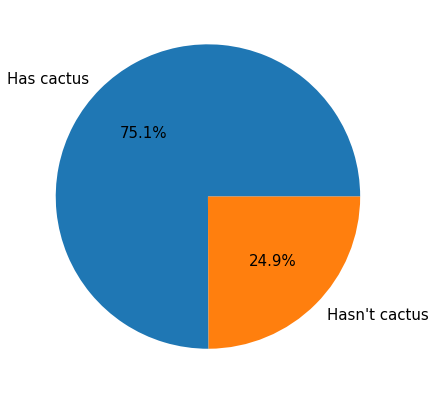

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

mpl.rc('font', size=15)
plt.figure(figsize=(7,7))

label = ['Has cactus', 'Hasn\'t cactus'] # 타깃 값 레이블
# 타깃 값 분포 파이 그래프
plt.pie(labels['has_cactus'].value_counts(), labels=label, autopct='%1.1f%%');

In [5]:
from zipfile import ZipFile

# 훈련 이미지 데이터 압출 풀기
with ZipFile(data_path + 'train.zip') as zipper:
    zipper.extractall()
    
# 테스트 이미지 데이터 압출 풀기
with ZipFile(data_path + 'test.zip') as zipper:
    zipper.extractall()

In [6]:
import os

num_train = len(os.listdir('train/'))
num_test = len(os.listdir('test/'))

print(f'훈련 데이터 개수: {num_train}')
print(f'테스트 데이터 개수: {num_test}')

훈련 데이터 개수: 17500
테스트 데이터 개수: 4000


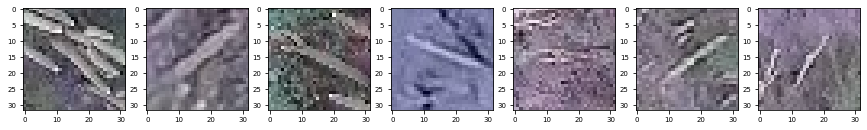

In [7]:
import cv2 # OpenCV 라이브러리

mpl.rc('font', size=7)
fig, axes = plt.subplots(1, 7, figsize=(15, 3))

# 선인장을 포함하는 이미지 파일명 (마지막 7개) ---①
last_has_cactus_img_name = labels[labels['has_cactus']==1]['id'][-7:]

# 이미지 출력 ---②
for idx, img_name in enumerate(last_has_cactus_img_name):
    path = 'train/' + img_name # 이미지 파일 경로 ---③
    img = cv2.imread(path) # 이미지 파일 읽기 ---④
    axes[idx].imshow(img) # 이미지 출력 ---⑤

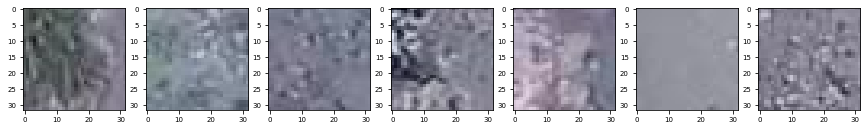

In [8]:
fig, axes = plt.subplots(1, 7, figsize=(15, 3))

# 선인장을 포함하지 않는 이미지 파일명 (마지막 7개) 
last_hasnt_cactus_img_name = labels[labels['has_cactus']==0]['id'][-7:]

# 이미지 출력
for idx, img_name in enumerate(last_hasnt_cactus_img_name):
    path = 'train/' + img_name # 이미지 파일 경로 
    img = cv2.imread(path) # 이미지 파일 읽기 
    axes[idx].imshow(img) # 이미지 출력 

In [9]:
img.shape

(32, 32, 3)